# 다중분류 - Iris  품종 에측

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리

In [30]:
iris = pd.read_csv('dataset/iris.csv',header= None)
iris.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [31]:
# LableEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(iris.iloc[:,-1].values)

In [32]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y)
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [33]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(iris.iloc[:,:-1].values)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(  
    X_scaled, y_onehot,
    stratify=y_onehot, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

## 모델 정의/ 설정 / 학습 / 평가

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu')) #HIDDEN LAYER: input demension을 x의 열개수와 맞춤 
model.add(Dense(3, activation= 'softmax')) #OUTPYT LAYER: output demension을 y의 열개수와 맞춤 , # y가 여러개 이므로 sigmoid말고 softmax 사용
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(
    optimizer='adam', loss= 'categorical_crossentropy', metrics = ['accuracy']
)

In [41]:
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs= 500, batch_size = 30 , verbose =0
)

In [42]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 999us/step - loss: 0.1587 - accuracy: 0.9474


[0.15865732729434967, 0.9473684430122375]

## 모델 SAVE / LOAD

In [43]:
model.save('model/iris_model.h5')

In [44]:
from tensorflow.keras.models import load_model
my_model = load_model('model/iris_model.h5')

In [45]:
my_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 999us/step - loss: 0.1587 - accuracy: 0.9474


[0.15865732729434967, 0.9473684430122375]

## 훈련과정 시각화

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

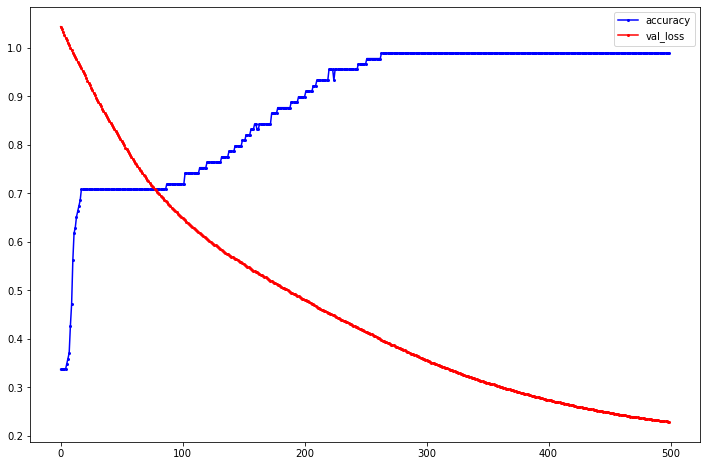

In [48]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()